# Mô tả dữ liệu bằng Arviz

### Bs. Lê Ngọc Khả Nhi

Bài thực hành nảy nhằm hướng dẫn dùng package Arviz để thực hiện các biểu đồ mô tả đữ liệu đơn giản.

Arviz (https://arviz-devs.github.io/arviz/index.html) là một thư viện đồ họa chuyên dụng cho Thống kê Bayes, cho phép vẽ các biểu đồ để diễn giải posterior distribution từ các mô hình Bayes. Tuy nhiên, ta có thể lợi dụng các hàm của Arviz cho mục tiêu thống kê mô tả đơn giản, vì sẽ tiện lợi hơn nhiều so với vẽ thủ công bằng matplotlib.

In [1]:
import arviz as az
import numpy as np
import pandas as pd

print('Arviz', az.__version__)

Arviz 0.6.1


Trước khi dùng arviz, dữ liệu đầu vào cần được chuyển đổi thành cấu trúc "inference_data" bằng hàm convert_to_inference_data; hàm này chấp nhận những output từ mô hình Bayes (pymc3, pystan, pyro, ...); tuy nhiên nó cũng dung nạp 2 kiểu đữ liệu không phải là mô hình Bayes, gồm numpy array và dictionary

## Từ 1D numpy array

In [24]:
n = 1000

np_1D_dat = az.convert_to_inference_data(np.random.normal(2,2,size = n))

print(np_1D_dat)

np_1D_dat.posterior

Inference data with groups:
	> posterior


<xarray.Dataset>
Dimensions:  (chain: 1, draw: 1000)
Coordinates:
  * chain    (chain) int32 0
  * draw     (draw) int32 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999
Data variables:
    x        (chain, draw) float64 -0.1002 -0.2813 -1.191 ... 2.061 3.396 6.181
Attributes:
    created_at:  2020-01-11T12:54:24.355381

## Từ pandas Series

In [3]:
pd_S = pd.Series(np.random.gamma(0.5, size = n))

pd_S_dat = az.convert_to_inference_data(pd_S.values)

print(pd_S_dat)

pd_S_dat.posterior

Inference data with groups:
	> posterior


<xarray.Dataset>
Dimensions:  (chain: 1, draw: 1000)
Coordinates:
  * chain    (chain) int32 0
  * draw     (draw) int32 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999
Data variables:
    x        (chain, draw) float64 0.2558 0.06689 0.02174 ... 0.03874 0.2252
Attributes:
    created_at:  2020-01-11T12:40:28.035358

## Từ nD numpy array (ma trận 2D, tensor, array đa chiều)

In [103]:
k = (1,1000,3)

np_3D_dat = az.convert_to_inference_data(np.random.randn(*k))

print(np_3D_dat)

np_3D_dat.posterior

Inference data with groups:
	> posterior


<xarray.Dataset>
Dimensions:  (chain: 1, draw: 1000, x_dim_0: 3)
Coordinates:
  * chain    (chain) int32 0
  * draw     (draw) int32 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999
  * x_dim_0  (x_dim_0) int32 0 1 2
Data variables:
    x        (chain, draw, x_dim_0) float64 0.6901 0.9423 ... 0.5684 -0.7802
Attributes:
    created_at:  2020-01-11T14:06:56.119340

## Từ Dictionary

In [200]:
datadict = {
    'X': np.random.normal(1,2,size = n),
    'Y': np.random.normal(1,2,size = n)*2 + np.random.rand(1000),
    'Z': np.random.normal(1,2,size = n)*(-2) + np.random.rand(1000),
}

data_dict = az.convert_to_inference_data(datadict)

data_dict.posterior

<xarray.Dataset>
Dimensions:  (chain: 1, draw: 1000)
Coordinates:
  * chain    (chain) int32 0
  * draw     (draw) int32 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999
Data variables:
    X        (chain, draw) float64 0.6521 2.305 -2.11 ... 1.65 -0.004751 4.401
    Y        (chain, draw) float64 -2.296 4.963 0.3965 ... 2.754 -0.6594 5.645
    Z        (chain, draw) float64 0.2681 -0.73 -2.201 ... -3.073 -3.459 4.113
Attributes:
    created_at:  2020-01-11T15:01:22.911308

## Từ pandas dataframe

In [202]:
pd_df = pd.DataFrame(datadict)

pd_df.head()

,X,Y,Z
0,0.652067,-2.295821,0.268065
1,2.305295,4.962889,-0.730032
2,-2.109935,0.396504,-2.201488
3,-0.488046,0.980823,2.403660
4,2.114529,7.940946,1.196799


In [208]:
data_df= az.convert_to_inference_data(pd_df.to_numpy())

data_df.posterior

C:\Users\bacsi\Anaconda3\lib\site-packages\arviz\data\base.py:145: SyntaxWarning: More chains (1000) than draws (3). Passed array should have shape (chains, draws, *shape)
  SyntaxWarning,


<xarray.Dataset>
Dimensions:  (chain: 1000, draw: 3)
Coordinates:
  * chain    (chain) int32 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999
  * draw     (draw) int32 0 1 2
Data variables:
    x        (chain, draw) float64 0.6521 -2.296 0.2681 ... 4.401 5.645 4.113
Attributes:
    created_at:  2020-01-11T15:04:31.777300

In [209]:
data_df= az.convert_to_inference_data(pd_df.values)

data_df.posterior

<xarray.Dataset>
Dimensions:  (chain: 1000, draw: 3)
Coordinates:
  * chain    (chain) int32 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999
  * draw     (draw) int32 0 1 2
Data variables:
    x        (chain, draw) float64 0.6521 -2.296 0.2681 ... 4.401 5.645 4.113
Attributes:
    created_at:  2020-01-11T15:04:55.328330

Có nhiều phong cách mỹ thuật khác nhau để chọn:

In [16]:
az.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test',
 'arviz-colors',
 'arviz-darkgrid',
 'arviz-white',
 'arviz-whitegrid']

In [17]:
az.style.use('arviz-whitegrid')

# Hàm plot_dist

Hàm này cho phép biểu diễn hàm mật độ phân phối (PDF, CDF), biểu đồ 1D KDE, 1D Histogram và 2D KDE

Ưu điểm : arviz tự động nhận ra biến liên tục và dùng KDE, biến rời rạc để dùng histogram. Nó cho phép kết hợp thêm Rugs layer, hỗ trợ hàm CDF lẫn PDF

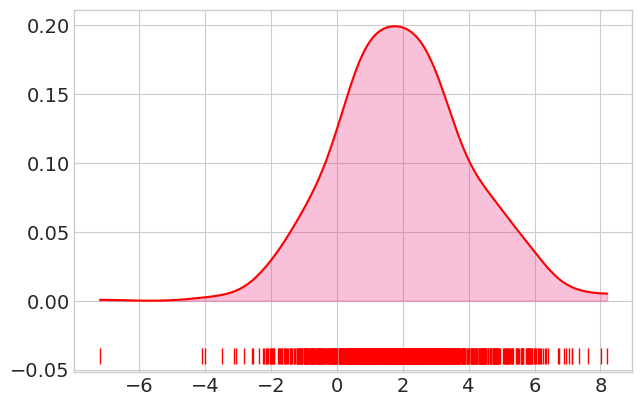

In [44]:
az.plot_dist(np_1D_dat.posterior.x, 
             rug = True, 
             color ="red", 
             fill_kwargs={'alpha': 0.3, 'color':'#eb3483'},)

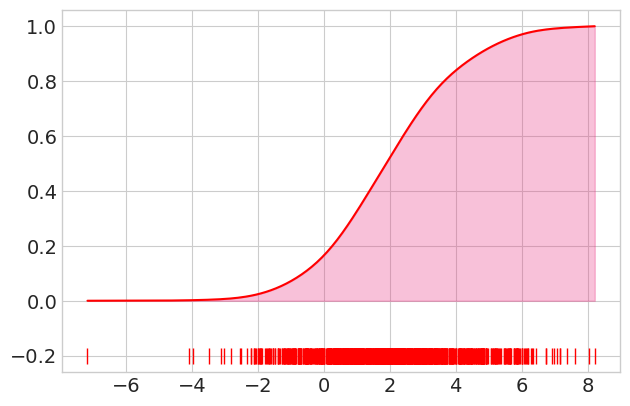

In [42]:
az.plot_dist(np_1D_dat.posterior.x, 
             rug = True, 
             cumulative =True,
             color ="red", 
             fill_kwargs={'alpha': 0.3, 'color':'#eb3483'},)

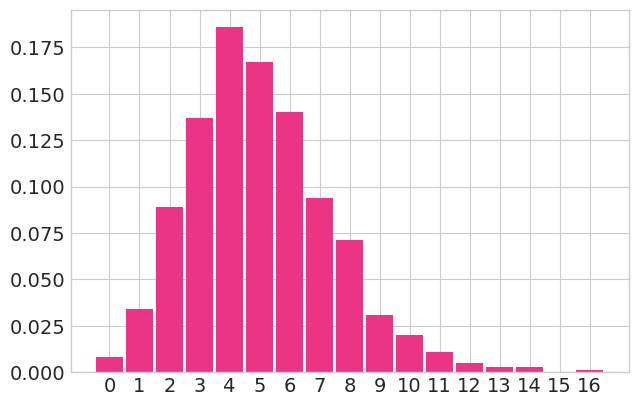

In [35]:
az.plot_dist(np.random.poisson(5, 1000), 
             color ="#eb3483",)

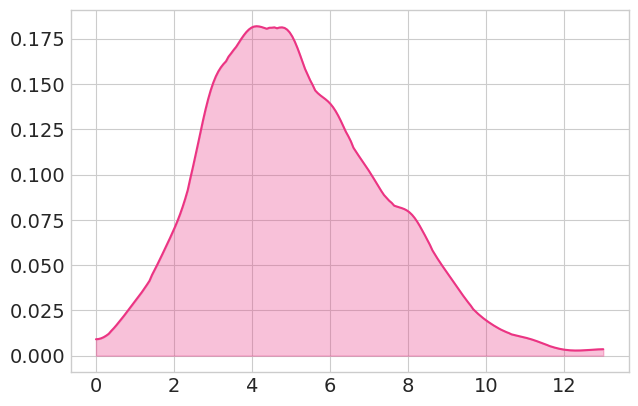

In [41]:
az.plot_dist(np.random.poisson(5, 1000), 
             color ="#eb3483",
             fill_kwargs={'alpha': 0.3, 'color':'#eb3483'},
            kind = 'kde')

Hơn thế nữa, hàm plot_dist vẽ được 2D KDE rất đẹp:

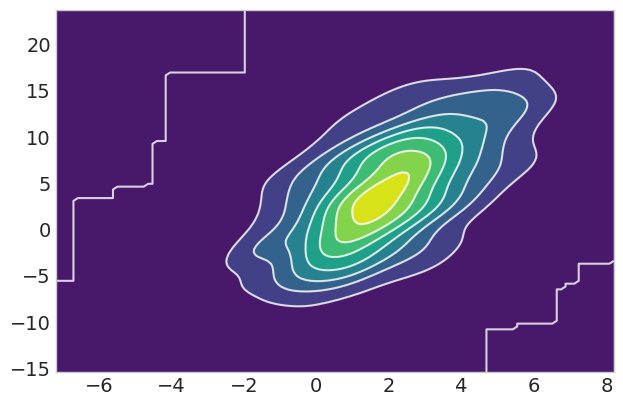

In [57]:
az.plot_dist(np_1D_dat.posterior.x, 
             np_1D_dat.posterior.x * 2 + np.random.normal(0,5,1000),
             contour = True,
             contour_kwargs={'colors': 'white','alpha':0.8,}
            )

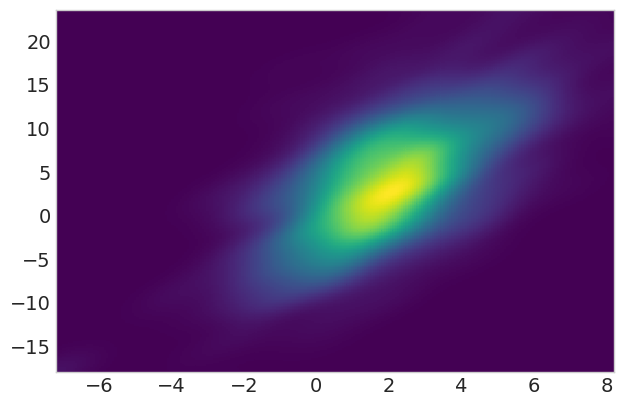

In [114]:
az.plot_dist(np_1D_dat.posterior.x, 
             np_1D_dat.posterior.x * 2 + np.random.normal(0,5,1000),
             contour = False,
             contour_kwargs={'colors': 'white','alpha':0.8,}
            )

## Hàm plot_posterior: Suy diễn thống kê

Hàm này dùng để suy diễn phân phối hậu nghiệm của các mô hình Bayes, tuy nhiên không gì ngăn cản chúng ta dùng nó cho dữ liệu 1D bất kì.

Hàm này dùng làm thống kê mô tả cực kì hiệu quả, vì nó cho phép kết hợp 1D KDE plot và các trị số thống kê median, mean, mode, khoảng tin cậy, và suy diễn thống kê dựa vào các method Bayes như HDP (tương tự như CI), Khoảng vô nghĩa thực dụng (ROPE), ngưỡng vô hiệu (ref_val):

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000011BF5F31B48>],
      dtype=object)

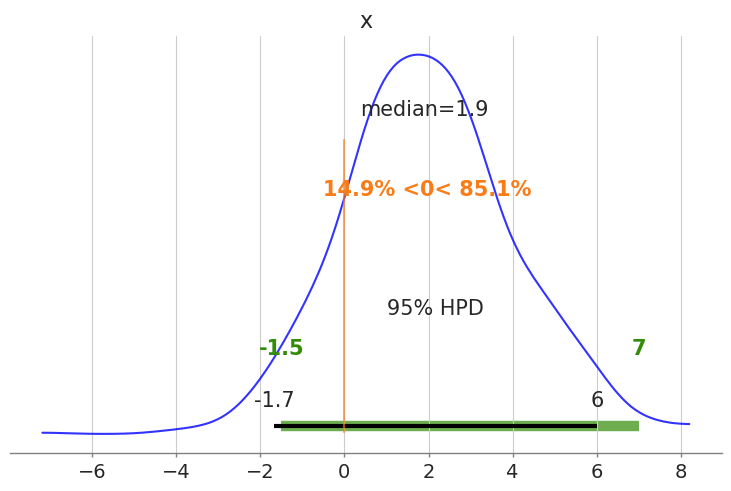

In [74]:
az.plot_posterior(np_1D_dat, 
                  var_names = ['x'],
                  credible_interval = 0.95,
                  point_estimate = 'median',
                  rope = (-1.5,7),
                  ref_val = 0,
                  **{'alpha': 0.8, 'color':'blue'})

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000011BF6651E08>],
      dtype=object)

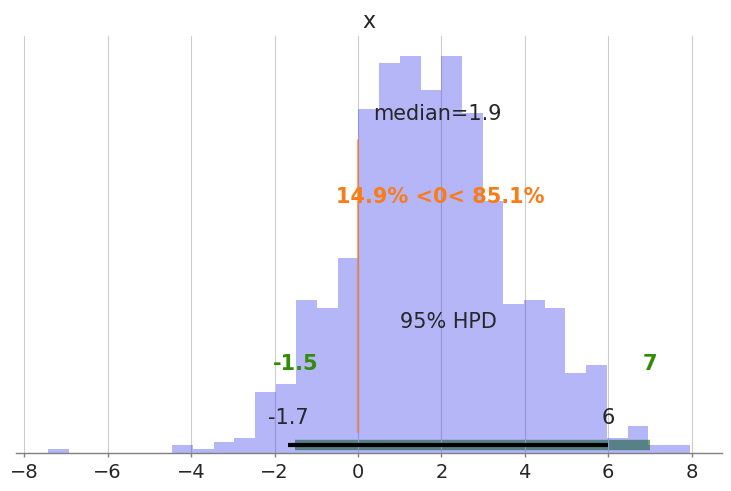

In [76]:
az.plot_posterior(np_1D_dat, 
                  var_names = ['x'],
                  credible_interval = 0.95,
                  point_estimate = 'median',
                  rope = (-1.5,7),
                  ref_val = 0,
                  kind = 'hist',)

Hàm này dùng tốt cho dữ liệu đa biến:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000011BF8B4FE08>,
      dtype=object)

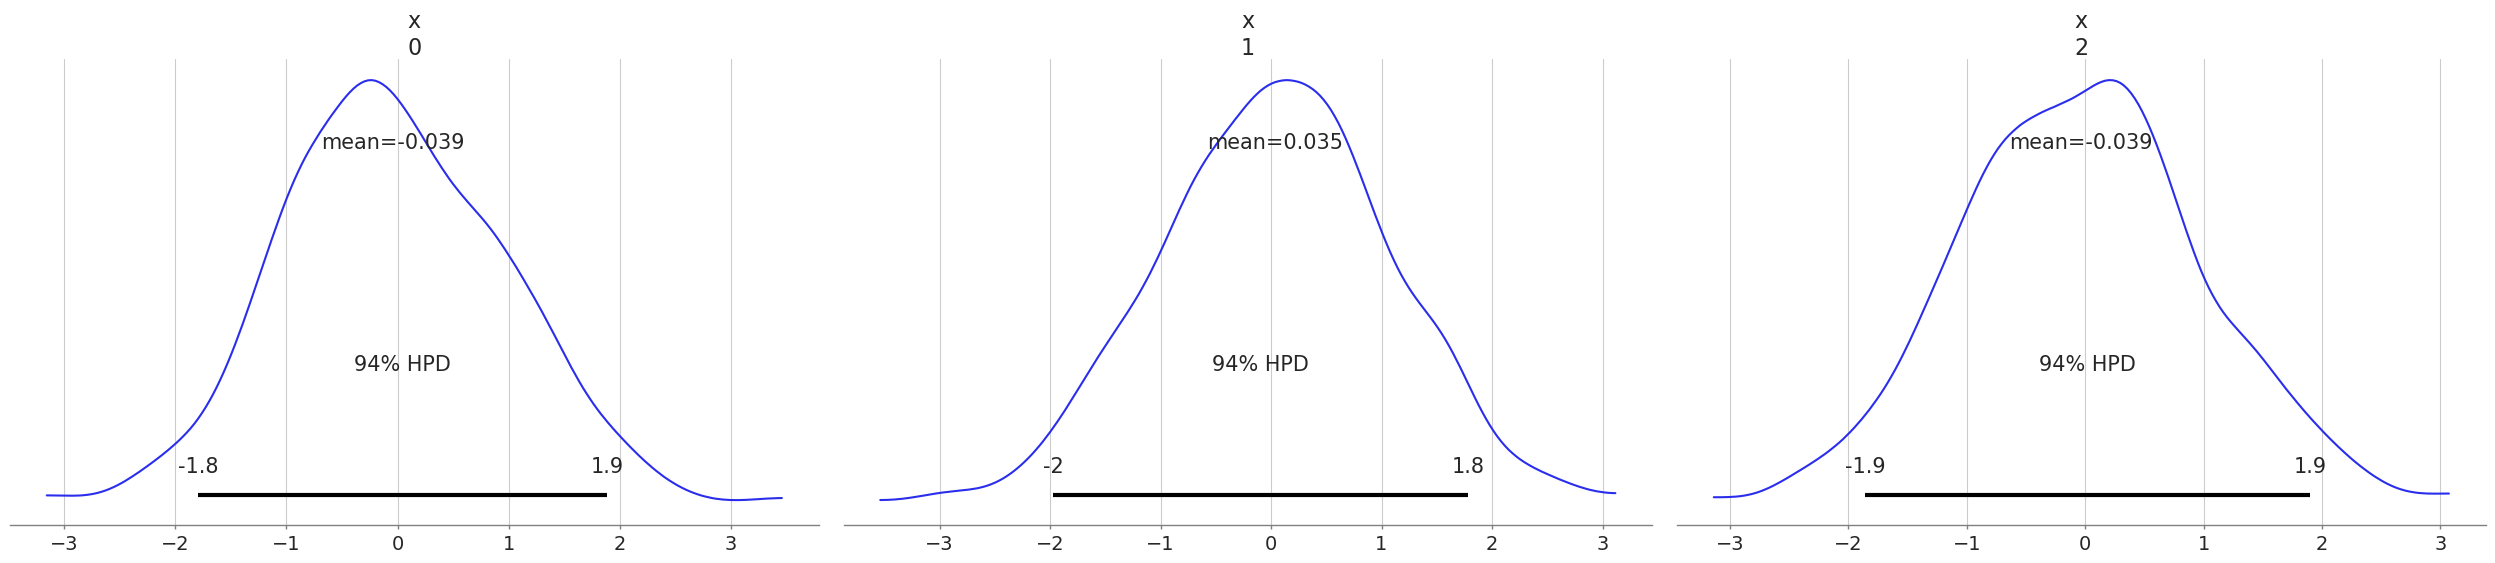

In [80]:
az.plot_posterior(np_3D_dat)

## Hàm plot_density

Hàm plot_density có công dụng đơn giản hơn plot_posterior, nó trình bày thêm 1 điểm giá trị Median hoặc mean, mode; 

Ưu thế của hàm này đó là cho phép so sánh 2 hay nhiều phân nhóm:

In [108]:
np_3D_dat2 = az.convert_to_inference_data(np.random.randn(*k)-1)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000011B80DA5508>,
      dtype=object)

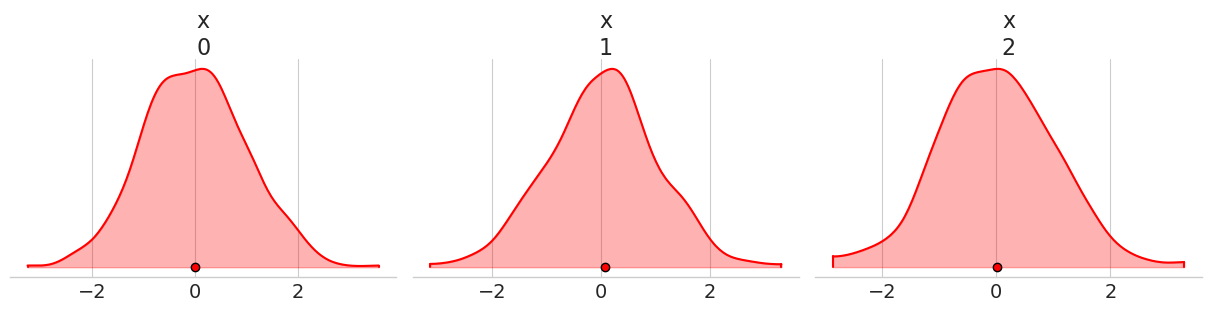

In [112]:
az.plot_density(np_3D_dat,
                figsize = (12,3),
                shade = 0.3, 
                point_estimate = "median",
                credible_interval =1,
                colors = "red")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000011B8103EFC8>,
      dtype=object)

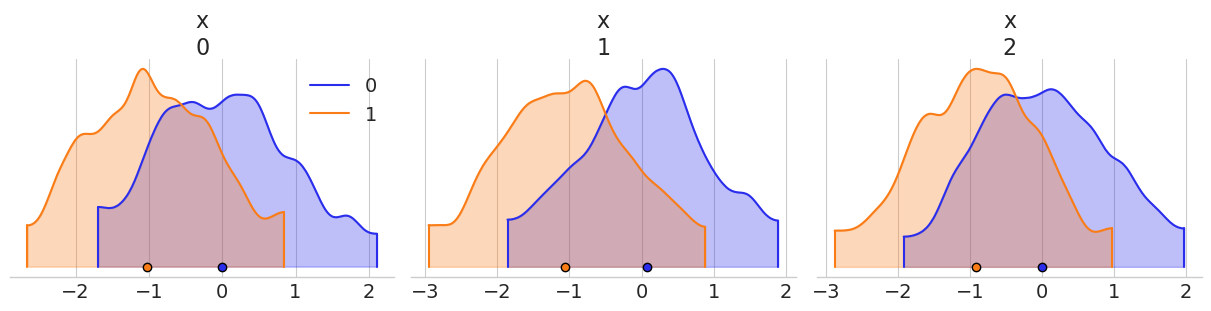

In [113]:
az.plot_density([np_3D_dat, np_3D_dat2],
                figsize = (12,3),
                shade = 0.3, 
                credible_interval =0.95,
                point_estimate = "median")

## Hàm plot_joint

Hàm plot_joint cho phép biểu diễn hình ảnh Xác suất kết hợp (Joint pribability) và Xác suất biên (Marginal prob) trên cùng 1 biểu đồ.

Xác suất kết hợp có thể biểu diễn bằng 3 kiểu hình họa: tán xạ, hex_bin và 2D KDE
Xác suất biên có 2 kiểu hình họa: 1D KDE và Histogram

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000011B813ED188>,
      dtype=object)

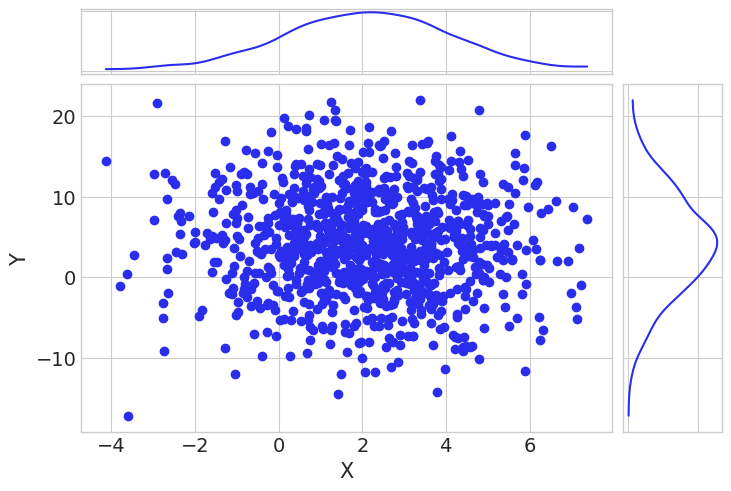

In [118]:
datadict = {
    'X': np.random.normal(2,2,size = n),
    'Y': np.random.normal(2,2,size = n)* 2 + np.random.normal(0,5,1000),
}

az.plot_joint(datadict)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000011B8349B048>,
      dtype=object)

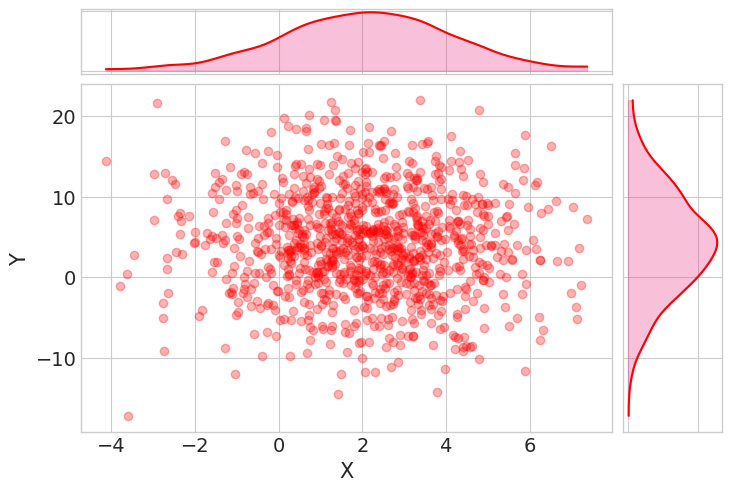

In [123]:
az.plot_joint(datadict,
             joint_kwargs = {'color':"red", 'alpha': 0.3},
              marginal_kwargs = {'color':'red',
                                 'fill_kwargs':{'alpha': 0.3, 'color':'#eb3483'}}
             )

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000011B84AB4C88>,
      dtype=object)

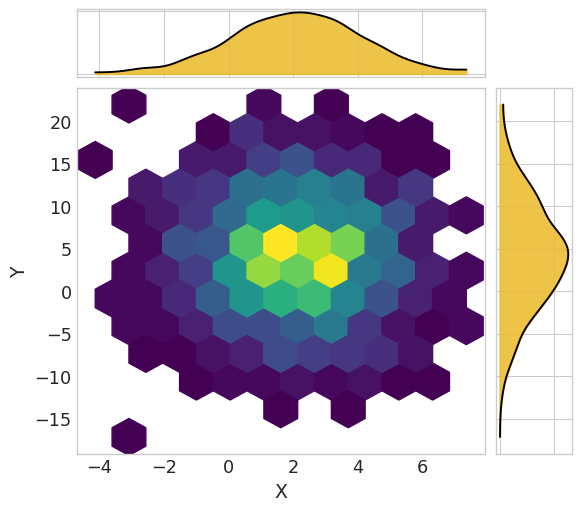

In [133]:
az.plot_joint(datadict,
              figsize=(5.7,5),
              kind = 'hexbin',
              marginal_kwargs = {'color':'black',
                                 'fill_kwargs':{'alpha': 0.9, 'color':'#ebbd34'}}
             )

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000011B84B44D88>,
      dtype=object)

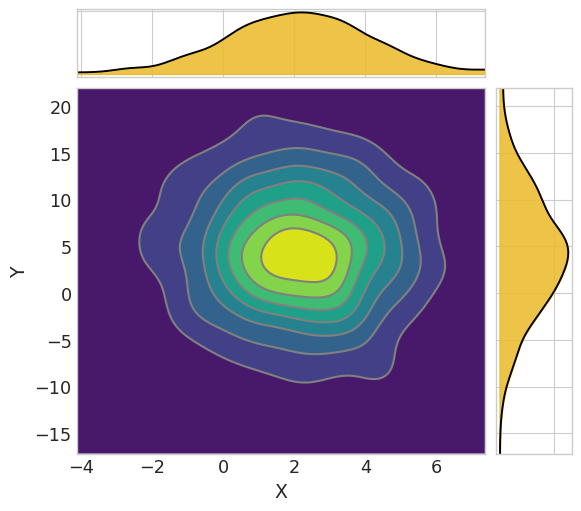

In [134]:
az.plot_joint(datadict,
              figsize=(5.7,5),
              kind = 'kde',
              marginal_kwargs = {'color':'black',
                                 'fill_kwargs':{'alpha': 0.9, 'color':'#ebbd34'}}
             )

## Hàm plot_pair

Hàm này là sự mở rộng của hàm plot_join, vì nó cho phép khảo sát bắt cặp tuần tự dữ liệu có từ 3 biến trở lên (ma trận tương quan).

In [152]:
datadict = {
    'X': np.random.normal(1,2,size = n),
    'Y': np.random.normal(1,2,size = n)*2 + np.random.rand(1000),
    'Z': np.random.normal(1,2,size = n)*(-2) + np.random.rand(1000),
}

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000011B87A3EBC8>,
      dtype=object)

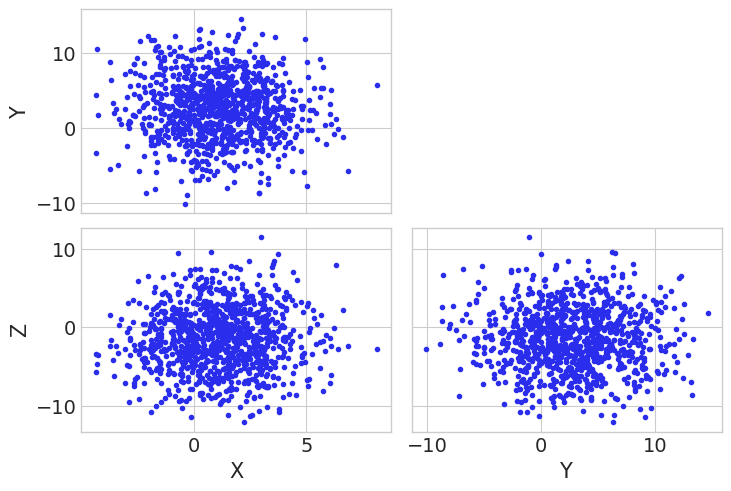

In [153]:
az.plot_pair(datadict)

C:\Users\bacsi\Anaconda3\lib\site-packages\arviz\plots\pairplot.py:168: SyntaxWarning: Divergences data not found, plotting without divergences. Make sure the sample method provides divergences data and that it is present in the `diverging` field of `sample_stats` or set divergences=False
  SyntaxWarning,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000011B91602648>,
      dtype=object)

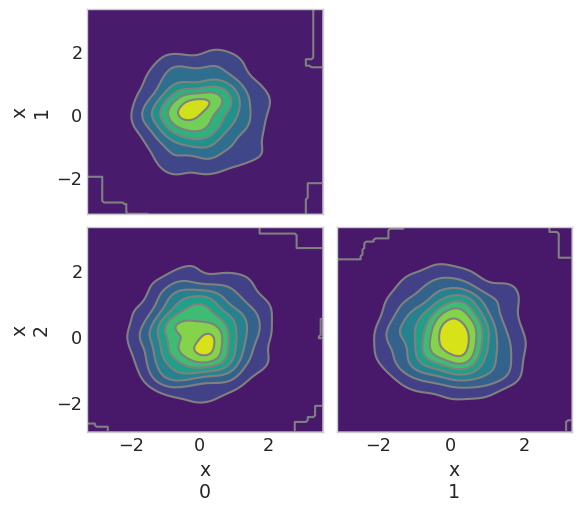

In [195]:
az.plot_pair(np_3D_dat,
             figsize=(5.7,5),
             coords =  {'x_dim_0': [0, 1, 2]},
             var_names = ['x'],
             kind = 'kde',
             divergences = True,
            )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000011B9118E588>,
      dtype=object)

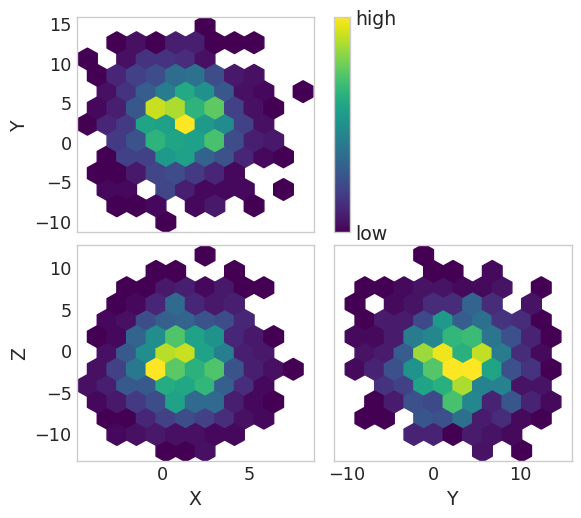

In [196]:
az.plot_pair(datadict, 
             figsize=(5.7,5),
             colorbar=True,
             kind ='hexbin')

## Hàm plot_forest

Hàm plot_forest cho phép biểu diễn nội dung các posterior distribution của coeficients các mô hình Bayes; tuy nhiên ta có thể dùng nó để so sánh trực quan giữa nhiều phân nhóm hay nhiều biến có cùng thang đo (tương đương ridge_plot, forest_plot)

In [214]:
datadict = {
    'X': np.random.normal(1,2,size = n),
    'Y': np.random.normal(1,2,size = n)*2 + np.random.rand(1000),
    'Z': np.random.normal(1,2,size = n)*(-2) + np.random.rand(1000),
}

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000011B8E7D3EC8>],
      dtype=object)

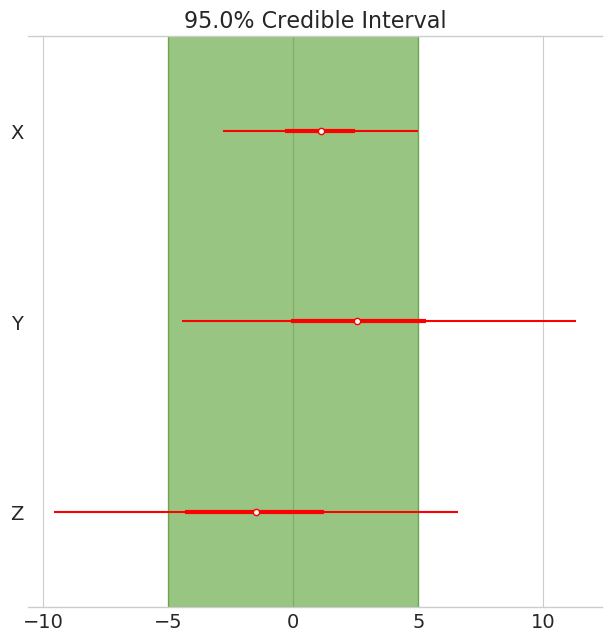

In [218]:
az.plot_forest(datadict, 
              kind="forestplot",
               rope = (-5,5),
              credible_interval = 0.95,
              colors = "red")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000011B930C1BC8>],
      dtype=object)

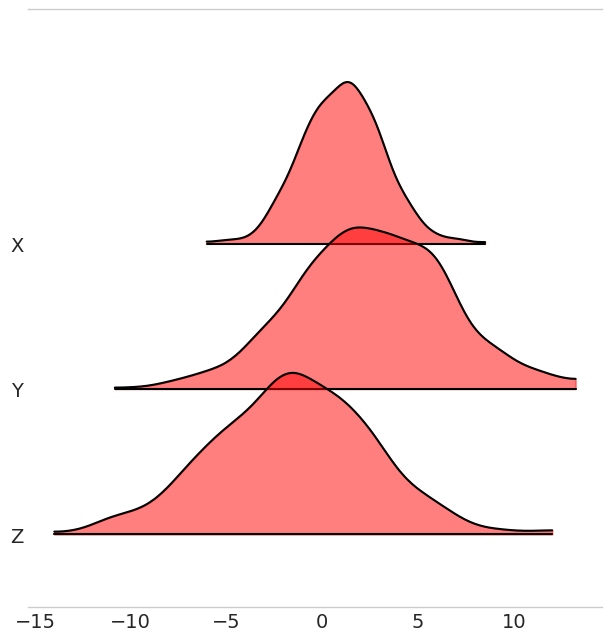

In [221]:
az.plot_forest(datadict, 
              kind="ridgeplot",
              credible_interval = 0.95,
               ridgeplot_alpha = 0.5,
               ridgeplot_overlap = 3,
              colors = "red")